# Simple Image Classification Using FastAI.jl
You can find original template from [documentation](https://colab.research.google.com/gist/lorenzoh/2fdc91f9e42a15e633861c640c68e5e8) 


The FastAI library is now on Julia with similar features available in Python. In this project, we are going to train the Resnet-18 model to classify images from the ImageNet dataset in simple steps.

![](./Image/image.jpg)
*Edited by Author | Elements by* [freepik.com](https://www.freepik.com/free-vector/hand-drawn-web-developers-working_12063788.htm#page=3&query=code&position=42)

# Introduction 

The [FastAI.jl](https://github.com/FluxML/FastAI.jl) library is similar to the [fast.ai](https://github.com/fastai/fastai) library in Python and it's the best way to experiment with your deep learning projects in Julia. The library allows you to use state-of-the-art models that you can modify, train, and evaluate by using few lines of code. The FastAI.jl provides a complete ecosystem for deep learning which includes computer vision, Natural Language processing, tabular data, and more submodules are added every month [FastAI (fluxml.ai)](https://fluxml.ai/FastAI.jl/dev/README.md.html). 

In this project, we are going to use the fastai library to train an image classifier on the [ImageNet](https://www.image-net.org/) dataset. The imagenette2-160 dataset is from the fastai dataset repository (https://course.fast.ai/datasets) that contains smaller size images of the things around us which range from animals to cars. The ResNet-18 model architecture is available at [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf). We won't be going deep into the dataset or how model architecture works, instead, we will be focusing on how fastai.jl has made deep learning easy.

![Picture title](./Image/image-20210908-184809.png)
[Global-Attributes Assisted Outdoor Scene Geometric Labeling](https://www.researchgate.net/publication/314646236_Global-Attributes_Assisted_Outdoor_Scene_Geometric_Labeling)

# Deepnote Envirnoment
For the Deepnote environment, you have to create a docker file and add👇

```bash
FROM gcr.io/deepnote-200602/templates/deepnote
RUN wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.2-linux-x86_64.tar.gz && \
    tar -xvzf julia-1.6.2-linux-x86_64.tar.gz && \
    sudo mv julia-1.6.2 /usr/lib/ && \
    sudo ln -s /usr/lib/julia-1.6.2/bin/julia /usr/bin/julia && \
    rm julia-1.6.2-linux-x86_64.tar.gz && \
    julia  -e "using Pkg;pkg\"add IJulia LinearAlgebra SparseArrays Images MAT\""
ENV DEFAULT_KERNEL_NAME "julia-1.6.2"
```

# Import

In [ ]:
using FastAI
Pkg.add("CairoMakie")

# Download the Dataset

In [ ]:
data, blocks = loaddataset("imagenette2-160", (Image, Label))

This program has requested access to the data dependency fastai-imagenette2-160.
which is not currently installed. It can be installed automatically, and you will not see this message again.

"imagenette2-160" from the fastai dataset repository (https://course.fast.ai/datasets)

A subset of 10 easily classified classes from Imagenet: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute

Download size: ???



Do you want to download the dataset from https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz to "/root/.julia/datadeps/fastai-imagenette2-160"?
[y/n]
stdin> y


┌ Info: Downloading
│   source = https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
│   dest = /root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160.tgz
│   progress = 1.0
│   time_taken = 2.87 s
│   time_remaining = 0.0 s
│   average_speed = 32.909 MiB/s
│   downloaded = 94.417 MiB
│   remaining = 0 bytes
│   total = 94.417 MiB
└ @ HTTP /root/.julia/packages/HTTP/5e2VH/src/download.jl:128



7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)


Extracting archive: 
--
Path = 
Type = tar
Code Page = UTF-8

Everything is Ok

Folders: 23
Files: 13397
Size:       107794109
Compressed: 6872064


((mapobs(loadfile, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…]), mapobs(parentname, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…])), (Image{2}(), Label{String}(["n01440764", "n02102040", "n02979186", "n03000684", "n03028079", "n03394916", "n03417042", "n03425413", "n03445777", "n03888257"])))

The **data** contains the location of images, and the **block** contains structure and images labels.

In [ ]:
data

(mapobs(loadfile, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…]), mapobs(parentname, ["/root/.julia/datadeps/fastai-imagenette2-160/imagenette2-160/train/n01440764/I…]))

In [ ]:
blocks

(Image{2}(), Label{String}(["n01440764", "n02102040", "n02979186", "n03000684", "n03028079", "n03394916", "n03417042", "n03425413", "n03445777", "n03888257"]))

# Exploring Image

class = "n01440764"


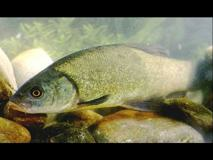

In [ ]:
image, class = sample =  getobs(data, 500)
@show class
image

We can check multiple photos with labels by using `getobs` and `plotsamples`.

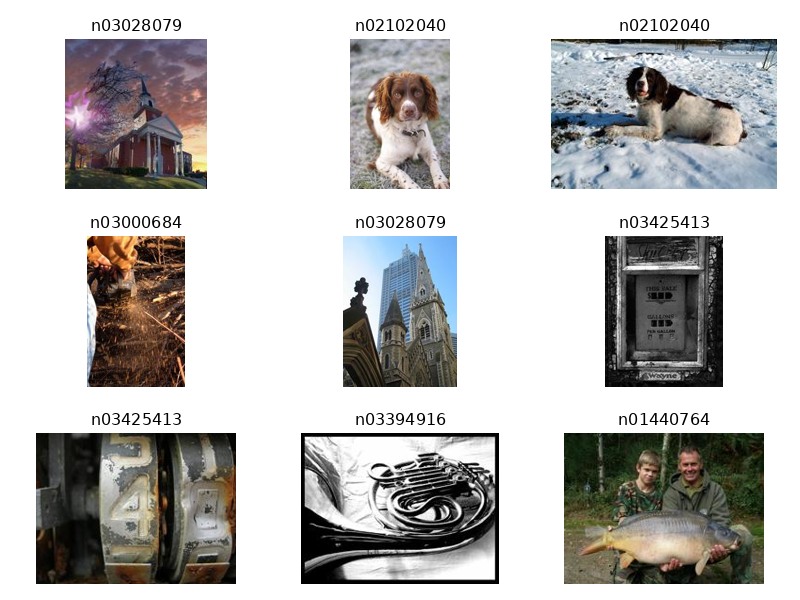

In [ ]:
idxs = rand(1:nobs(data), 9)
samples = [getobs(data, i) for i in idxs]
plotsamples(method, samples)

# Image Classification Function

In [ ]:
method = BlockMethod(
    blocks,
    (
        ProjectiveTransforms((128, 128)),
        ImagePreprocessing(),
        OneHot()
    )
)

BlockMethod(Image{2} -> Label{String})

You can just use the `ImageClassificationSingle` function to reproduce equivalent results.

In [ ]:
method = ImageClassificationSingle(blocks)
method

BlockMethod(Image{2} -> Label{String})

# Building model

1. First, we need to use a data loader to load image links and use the transformation method. This will convert images and Labels into integer data.
2. `methodmodel` takes the method from the image loader and ResNet architect to build a model for training.
3. we can simply create a loss function by adding the method into `metholossfn`. By default, the loss function is `CrossEntropy`.
4. By using `Learner` we combine, method, data loader, optimizer which is ADAM, loss function, and Metric which is accuracy in our case. 

In [ ]:
dls = methoddataloaders(data, method)
model = methodmodel(method, Models.xresnet18())
lossfn = methodlossfn(method)
learner = Learner(model, dls, ADAM(), lossfn, ToGPU(), Metrics(accuracy))

Learner()

# Training and Evaluation
We will be training our model on 10 Epochs with a 0.002 learning rate.

In [ ]:
fitonecycle!(learner, 10, 0.002)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:05:50


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   1.0 │ 1.75345 │  0.43189 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:19


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.54432 │  0.53701 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:34


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.37105 │  0.56158 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:17


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 1.23731 │  0.62673 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:32


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   3.0 │ 1.09463 │  0.65127 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:17


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 1.11761 │  0.65932 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:31


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   4.0 │ 0.87518 │  0.71549 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   4.0 │ 0.95252 │   0.6995 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:29


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   5.0 │ 0.70251 │  0.77235 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   5.0 │ 0.77653 │  0.75314 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:29


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   6.0 │ 0.52883 │  0.82565 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 6 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   6.0 │ 0.76827 │   0.7698 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:28


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   7.0 │ 0.35174 │  0.88405 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 7 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16


┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   7.0 │ 0.7575 │  0.77955 │
└─────────────────┴───────┴────────┴──────────┘


Epoch 8 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:28


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   8.0 │ 0.20262 │  0.93675 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 8 ValidationPhase(): 100%|████████████████████████| Time: 0:00:16


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   8.0 │ 0.63952 │  0.81444 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 9 TrainingPhase(): 100%|██████████████████████████| Time: 0:03:28


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   9.0 │ 0.11359 │  0.96763 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 9 ValidationPhase(): 100%|████████████████████████| Time: 0:00:15


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   9.0 │ 0.59102 │  0.82806 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:03:27


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │  10.0 │ 0.07313 │  0.98377 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 10 ValidationPhase(): 100%|███████████████████████| Time: 0:00:16


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │  10.0 │ 0.59254 │  0.83267 │
└─────────────────┴───────┴─────────┴──────────┘


# Evaluating Prediction
As we can see all four photos were predicted correctly. You can also see the prediction but using `plotprediction` method.

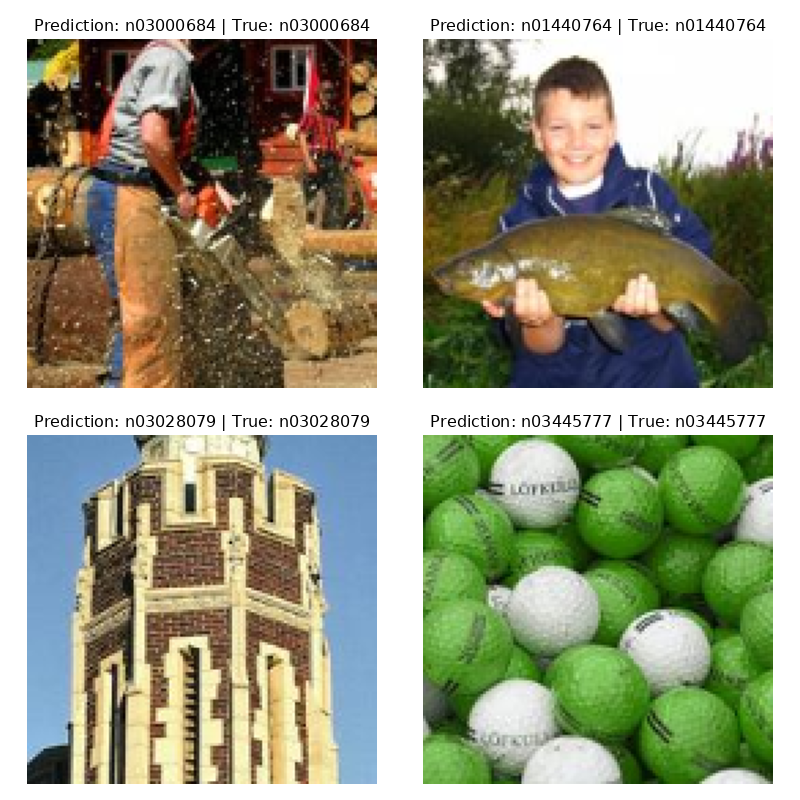

In [ ]:
plotpredictions(method, learner)

>*You can follow me on* [LinkedIn](https://www.linkedin.com/in/1abidaliawan/) *and* [Polywork ](https://www.polywork.com/kingabzpro)*where I post amazing articles on data science and machine learning.*

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c681a5a-1762-4c44-bebe-0bbb98ec0fe6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>